<a href="https://colab.research.google.com/github/sammatiphugate/sammatiphugate/blob/main/Car_Price_Prediction_sammati_phugate_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME : SAMMATI PHUGATE**


**ROLL NO : DS24MS28**

**PROJECT TITLE :  CAR PRICE PREDICTION**

**Objective:**

The objective of this project is to develop a predictive model that accurately estimates the selling price of used cars based on a variety of features, including brand, manufacturing year, kilometers driven, fuel type, and other relevant attributes. By applying regression techniques — starting with linear regression and exploring more advanced models such as Random Forest and XGBoost — the project aims to:

Understand the key factors that influence used car prices.

* Understand the key factors that influence used car prices.

* Build a robust, high-performing predictive model.


*   Provide insights into feature importance and market behavior.







**Import Libraries**






In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**LOAD DATASET**


In [231]:
car = pd.read_csv('/content/Car_Price.csv')
car.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [232]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [233]:
car.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [234]:
car.shape


(4340, 8)


**Creating backup copy**


In [235]:
backup=car.copy()


**DATA** **CLEANING**


In [236]:
car.isna().sum()


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


**No null value found**

In [237]:
#Remove duplicates
car.drop_duplicates(inplace=True)

In [238]:
#Changing car names. Keeping only the first three words
car['brand']=car['name'].str.split().str.slice(start=0,stop=1).str.join(' ')


In [239]:
car=car.reset_index(drop=True)

In [240]:
#Cleaned Data
car


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [241]:
car['brand'].unique()


array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

**Checking relationship of Company with Price**

In [242]:
car ['brand'].value_counts()


,count
brand,
Maruti,1072
Hyundai,637
Mahindra,328
Tata,308
Ford,220
Honda,216
Toyota,170
Chevrolet,151
Renault,110


<ipython-input-243-8fa442393070>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


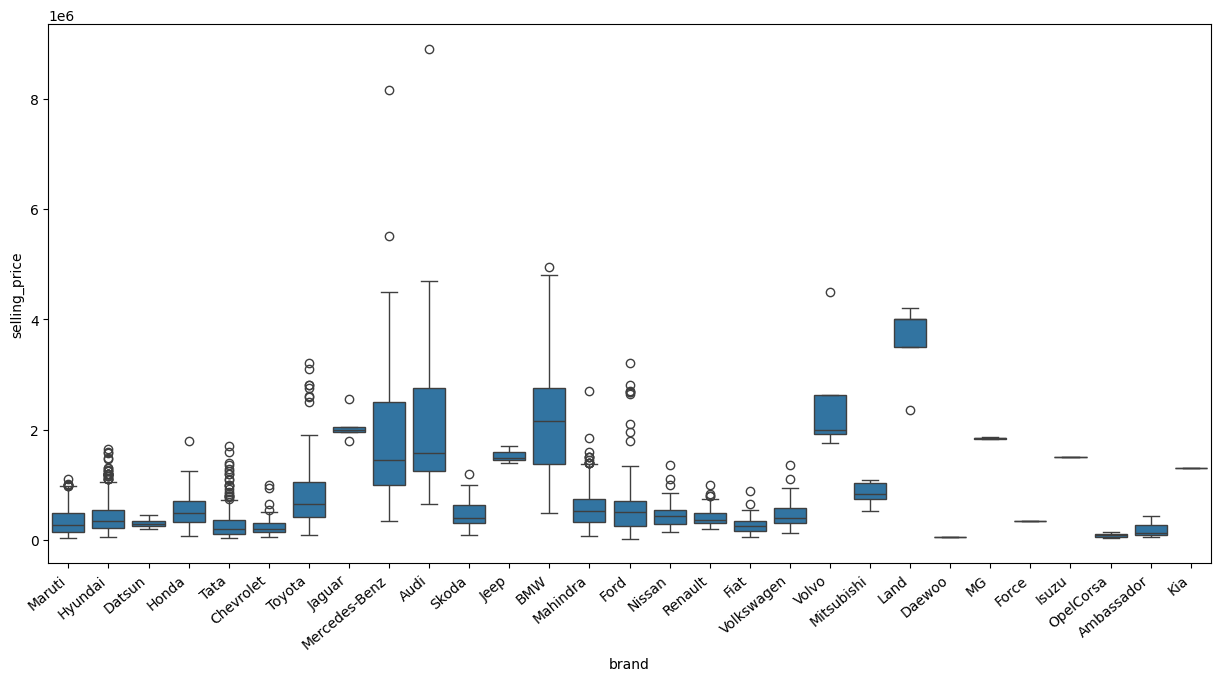

In [243]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='brand',y='selling_price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<Axes: xlabel='fuel', ylabel='selling_price'>

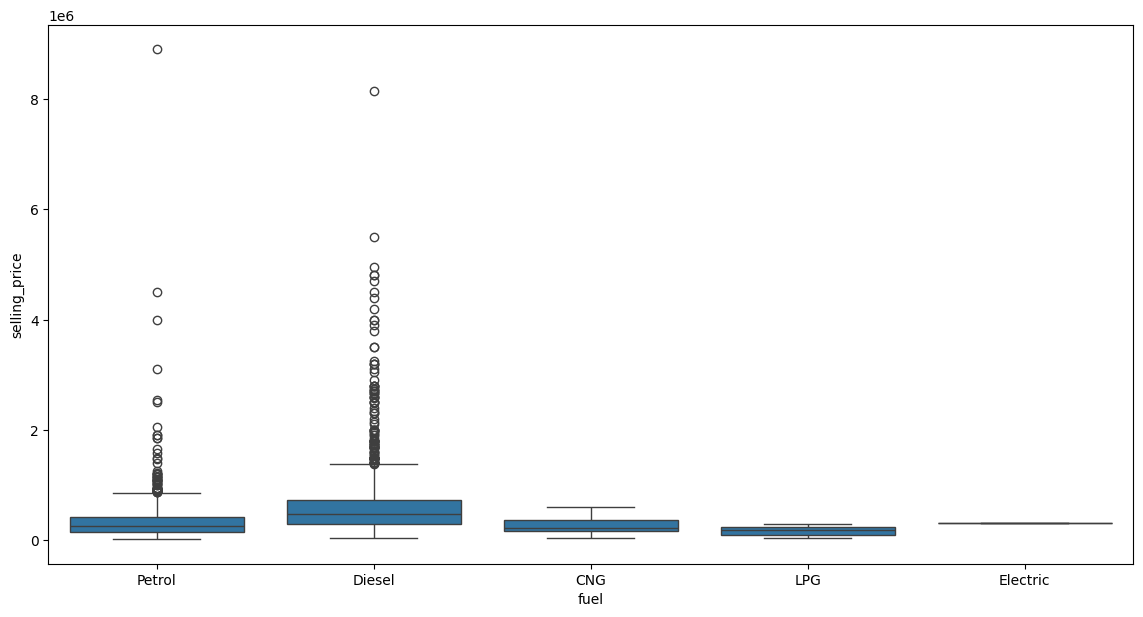

In [244]:
#Checking relationship of Fuel Type with Price
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel',y='selling_price',data=car)


<ipython-input-245-9eb47509ce31>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")


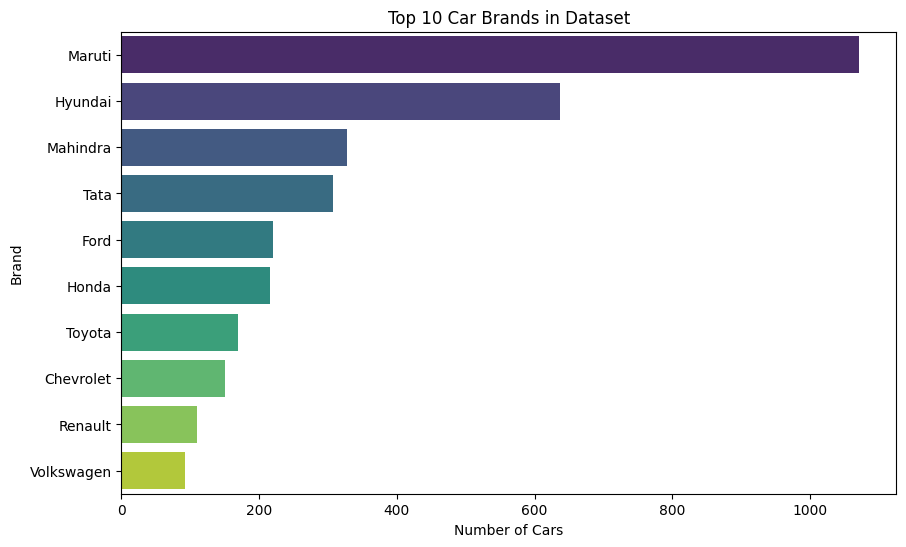

In [245]:
# Find top 10 brands
top_brands = car['brand'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title("Top 10 Car Brands in Dataset")
plt.xlabel("Number of Cars")
plt.ylabel("Brand")
plt.show()


<ipython-input-246-c8de219fe7ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel', data=car, palette="pastel")


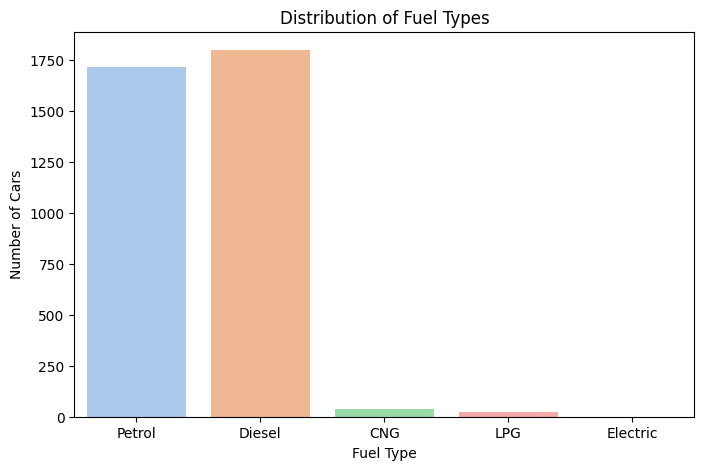

In [246]:
#Check how many cars use petrol, diesel, etc.

# Plot
plt.figure(figsize=(8,5))
sns.countplot(x='fuel', data=car, palette="pastel")
plt.title("Distribution of Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.show()


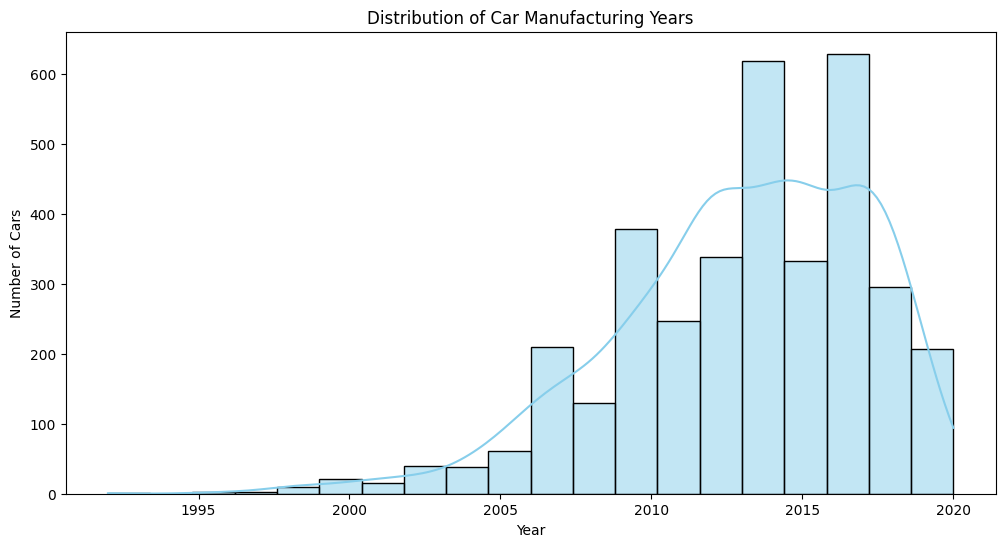

In [247]:
#Plot Year vs Number of Cars
#To see from which years most cars are being sold.

# Plot
plt.figure(figsize=(12,6))
sns.histplot(car['year'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Car Manufacturing Years")
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.show()

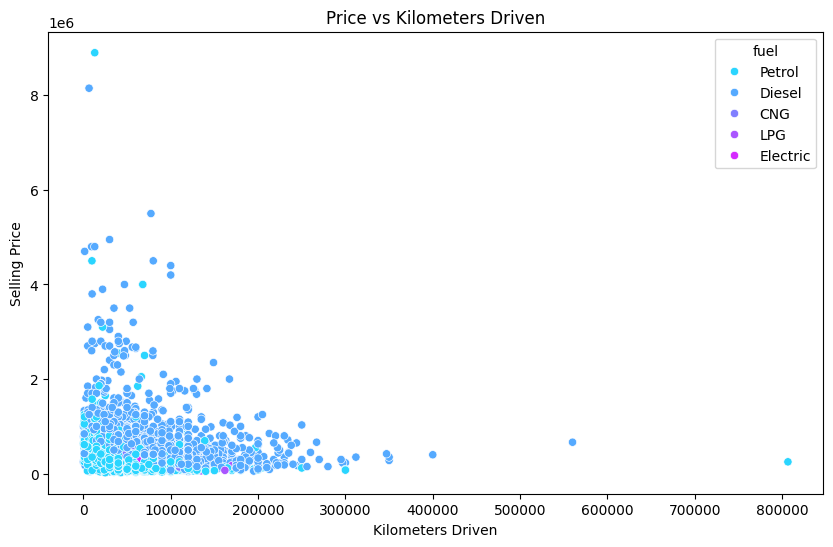

In [248]:
# Price vs Kilometers Driven
plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven', y='selling_price', data=car, hue='fuel', palette="cool")
plt.title("Price vs Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()

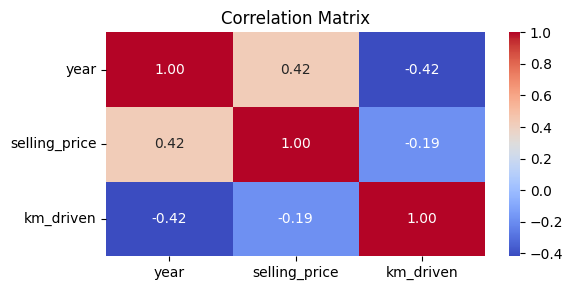

In [249]:
#Correlation Matrix
plt.figure(figsize=(6, 3))
numeric_car = car.select_dtypes(include=[np.number])  # Only numeric columns
sns.heatmap(numeric_car.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Summary of visualization
Observation:
Major Cars are of Petrol and Diesel
Most of the Cars are owned by individuals
Almost all cars are of manual transmission
Most of the cars are 1st owned.
The data is dominated by famous brands. Brands like kia, jaguar and Daewoo have very few cars.

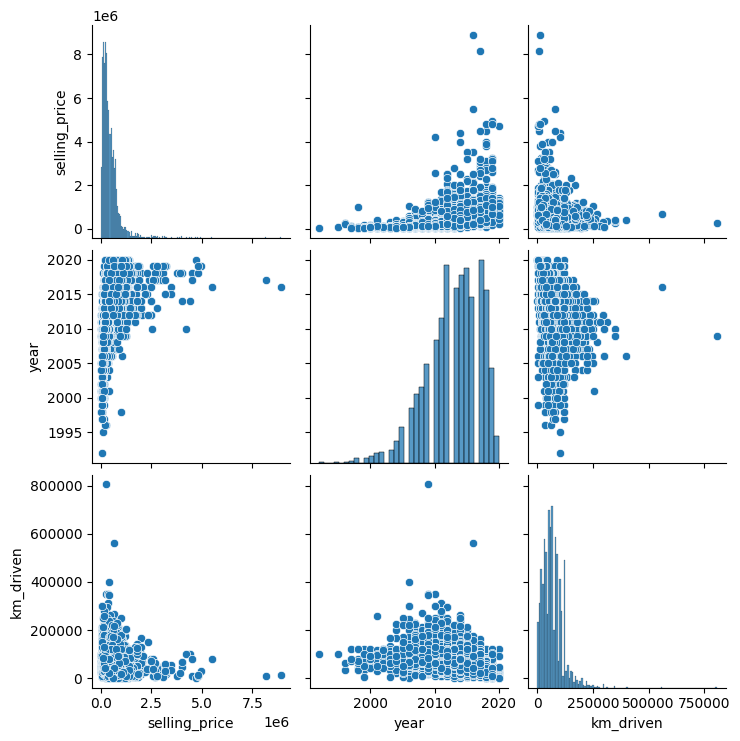

In [250]:
#Multivariate Analysis (Pairplot)
sns.pairplot(car[['selling_price', 'year', 'km_driven']])


In [251]:
# Outlier Treatment
car = car[car['selling_price'] < 25_00_000]  # remove very high selling prices if needed


In [252]:
#Check Distributions & Apply Transformations
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(car['selling_price'])}")
print(f"Kurtosis: {kurtosis(car['selling_price'])}")



Skewness: 1.846592301025725
Kurtosis: 4.89295213418641


In [293]:
car.loc[:, 'selling_price'] = np.log(car['selling_price'])
car.loc[:, 'km_driven'] = np.sqrt(car['km_driven'])



**Feature Engineering**

In [294]:
import datetime
current_year = datetime.datetime.now().year

car.loc[:, 'car_age'] = current_year - car['year']

#Age affects price directly: Older cars = cheaper.


**Splitting Data into train and test**

**Step 1: Select Features and Target**

In [255]:
# One-hot encoding for categorical columns
car = pd.get_dummies(car, drop_first=True)


In [256]:
# Step 3: Feature Engineering (creating 'car_age')
import datetime
current_year = datetime.datetime.now().year
car['car_age'] = current_year - car['year']

In [257]:
X = car.drop('selling_price', axis=1)
y = car['selling_price']


In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [264]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



**Train Linear Regression Model**


In [275]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [280]:
print("Train R^2:", lr.score(X_train, y_train) * 100)
print("Test R^2:", lr.score(X_test, y_test) * 100)

Train R^2: 95.64942625239023
Test R^2: 80.0207908189229


In [283]:
y_pred_lr = lr.predict(X_test)
#lr.score(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))


mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.2504395001832145
Root Mean Squared Error: 0.3462764792459336


In [285]:
#Difference Between Actual and Predicted
# Create DataFrame to compare
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': lr_pred,
})

# Add a Difference column
comparison['Difference'] = comparison['Actual'] - comparison['Predicted']

# Show first few rows
print(comparison.head())


         Actual  Predicted  Difference
332   12.899220  12.909427   -0.010207
3451  10.841755  11.315304   -0.473549
3222  13.579788  13.776461   -0.196673
761   13.384728  13.346592    0.038136
306   14.133964  13.274082    0.859882


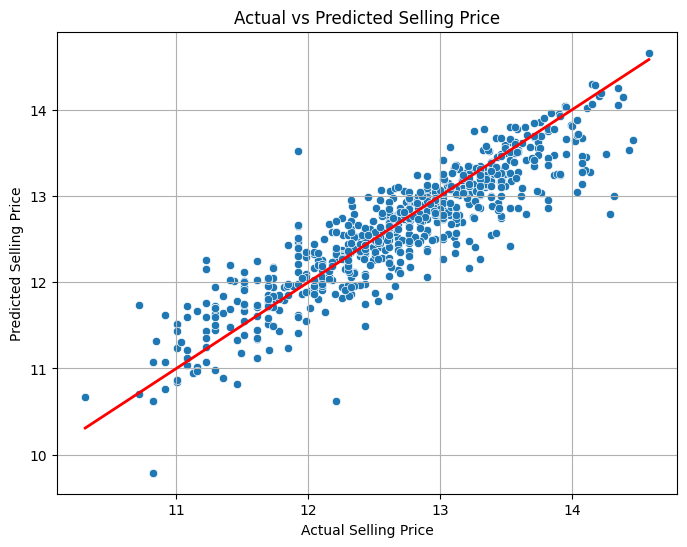

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to compare actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred})

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.plot([results.Actual.min(), results.Actual.max()],
         [results.Actual.min(), results.Actual.max()],
         color='red', lw=2)  # Ideal line
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()


In [287]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



In [288]:
#RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [290]:
#Support Vector Regressor (SVR)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


In [291]:
#K Nearest Neighbor Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [292]:
#Cross Validation
models = [lr, dt, rf, svr, knn]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    print(f"{name}: Mean R2 Score = {scores.mean()}")



Linear Regression: Mean R2 Score = 0.8348995404219485
Decision Tree: Mean R2 Score = 0.6691666193333035
Random Forest: Mean R2 Score = 0.7881452449018536
SVM: Mean R2 Score = 0.09872404750080546
KNN: Mean R2 Score = 0.5288938168669259


🏆 Best Performing Model:
Random Forest Regressor showed the best overall performance.

It achieved the highest R² score and the lowest error metrics.

Random Forest works well because it combines many decision trees to make strong, stable predictions.

